In [2]:
# Load up three parameters
with open('x_coords.txt') as f:
    lines = f.readlines()
x_lines = [int(x.rstrip('\n')) for x in lines]
with open('y_coords.txt') as f:
    lines = f.readlines()
y_lines = [int(x.rstrip('\n')) for x in lines]
with open('average_quality_scores.txt') as f:
    lines = f.readlines()
average_qas = [float(x.rstrip('\n')) for x in lines]

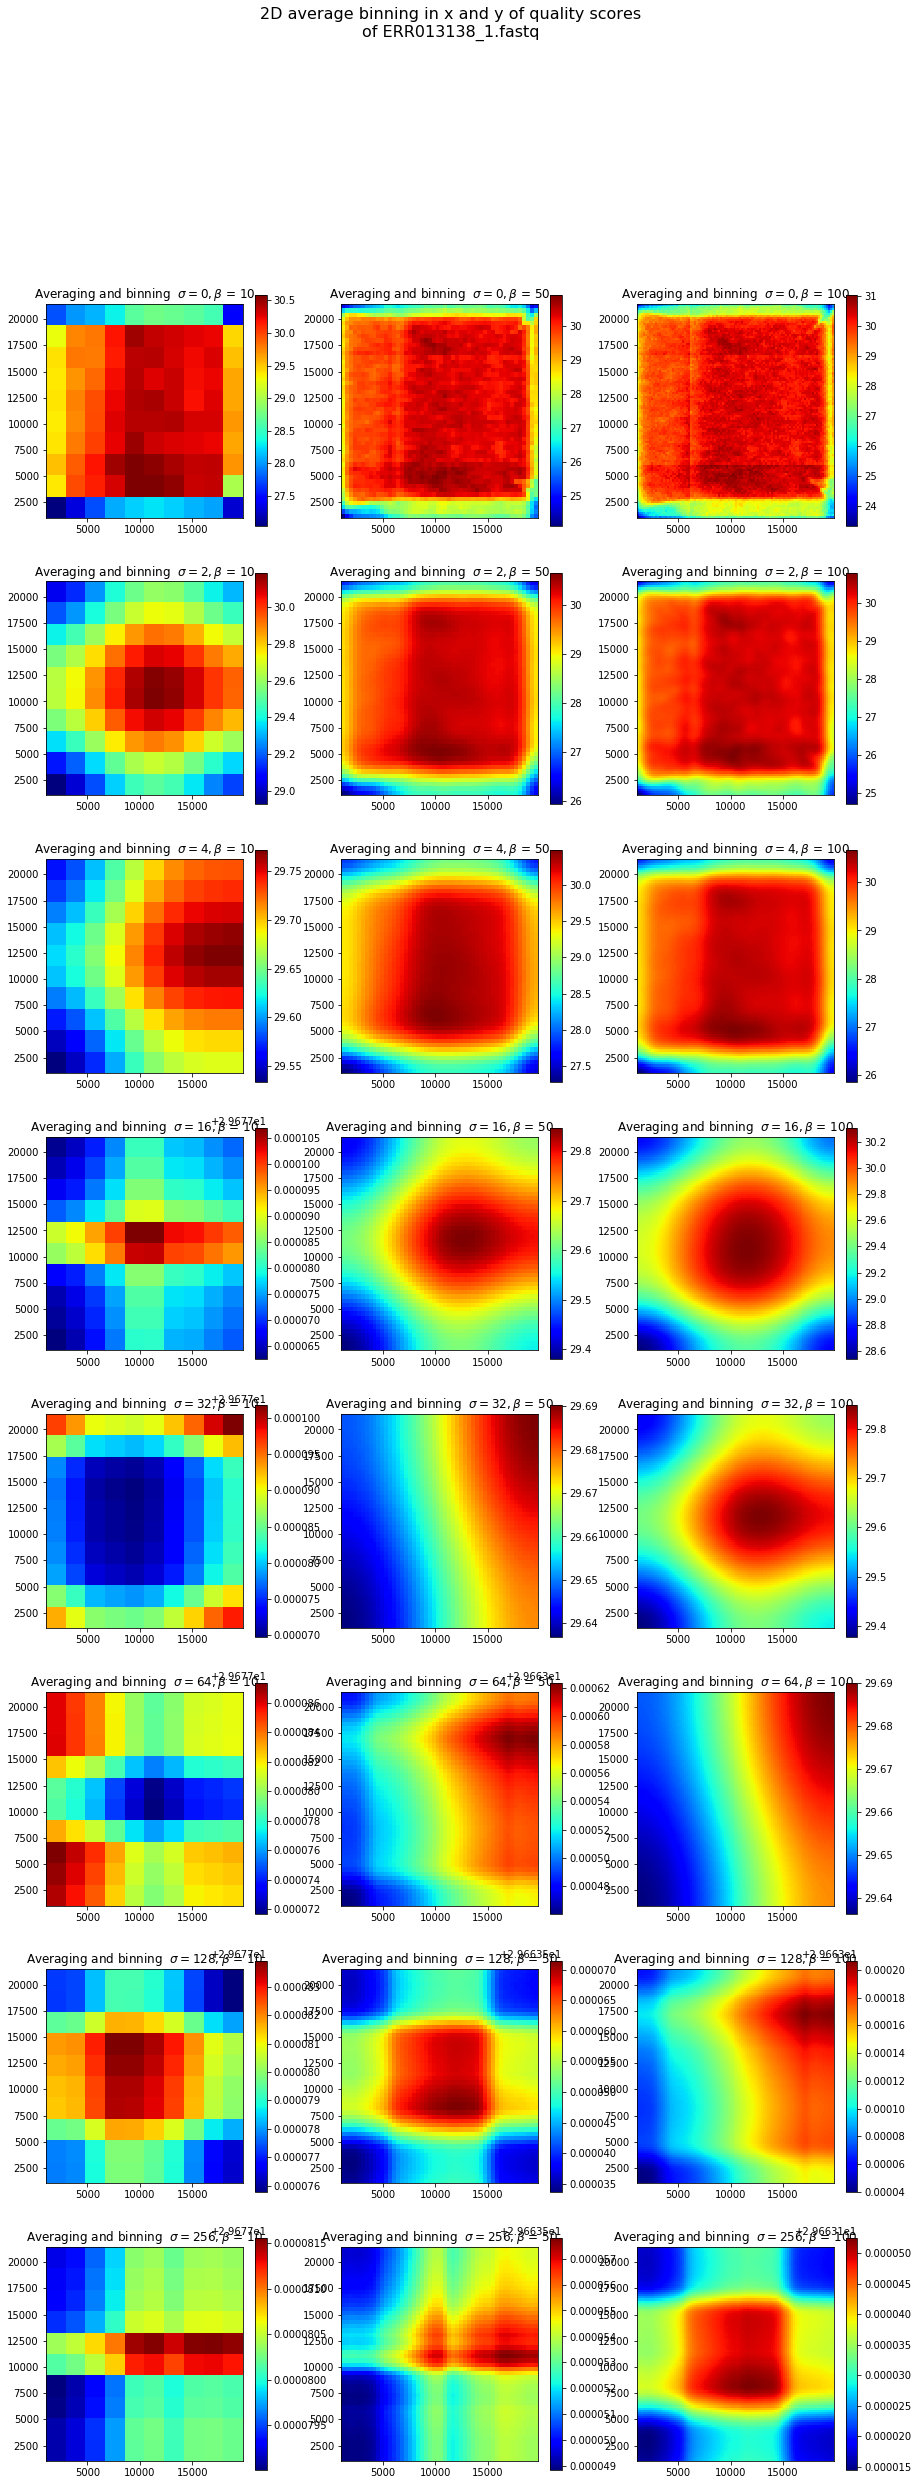

In [5]:
# Averages
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from scipy.ndimage.filters import gaussian_filter
import scipy.stats

def myplot(x, y, w, s, b):
    heatmap, xedges, yedges, k = scipy.stats.binned_statistic_2d(x, y, w, bins=b)
    med = np.median(heatmap)
    heatmap = np.nan_to_num(heatmap, nan=med)
    heatmap = gaussian_filter(heatmap, sigma=s)
    extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
    return heatmap.T, extent

fig, axs = plt.subplots(8,3,figsize=(15,40))

sigmas = [0,0,0, 2,2,2, 4,4,4, 16,16,16, 32,32,32, 64,64,64, 128,128,128, 256,256,256]
bins = [10,50,100, 10,50,100, 10,50,100, 10,50,100, 10,50,100, 10,50,100, 10,50,100, 10,50,100]

for ax, s, b in zip(axs.flatten(), sigmas, bins):
    img, extent = myplot(x_lines, y_lines, average_qas, s, b)
    res = ax.imshow(img, extent=extent, origin='lower', cmap=cm.jet)
    ax.set_title(r"Averaging and binning  $\sigma = %d, \beta$ = %d" % (s,b))
    #ax.set_title(r"Averaging and binning, $\beta$ = %d" % (s))
    fig.colorbar(res, ax=ax)

fig.suptitle('2D average binning in x and y of quality scores\nof ERR013138_1.fastq', fontsize=16)

#plt.tight_layout()
plt.savefig('full_genome_x_and_y_and_qa_average_binning_smoothing.png')
plt.show()

In [8]:
# Load up three parameters
with open('x_coords.txt') as f:
    lines = f.readlines()
x_lines = [int(x.rstrip('\n')) for x in lines]
with open('y_coords.txt') as f:
    lines = f.readlines()
y_lines = [int(x.rstrip('\n')) for x in lines]
with open('median_qualities.txt') as f:
    lines = f.readlines()
median_qas = [float(x.rstrip('\n')) for x in lines]

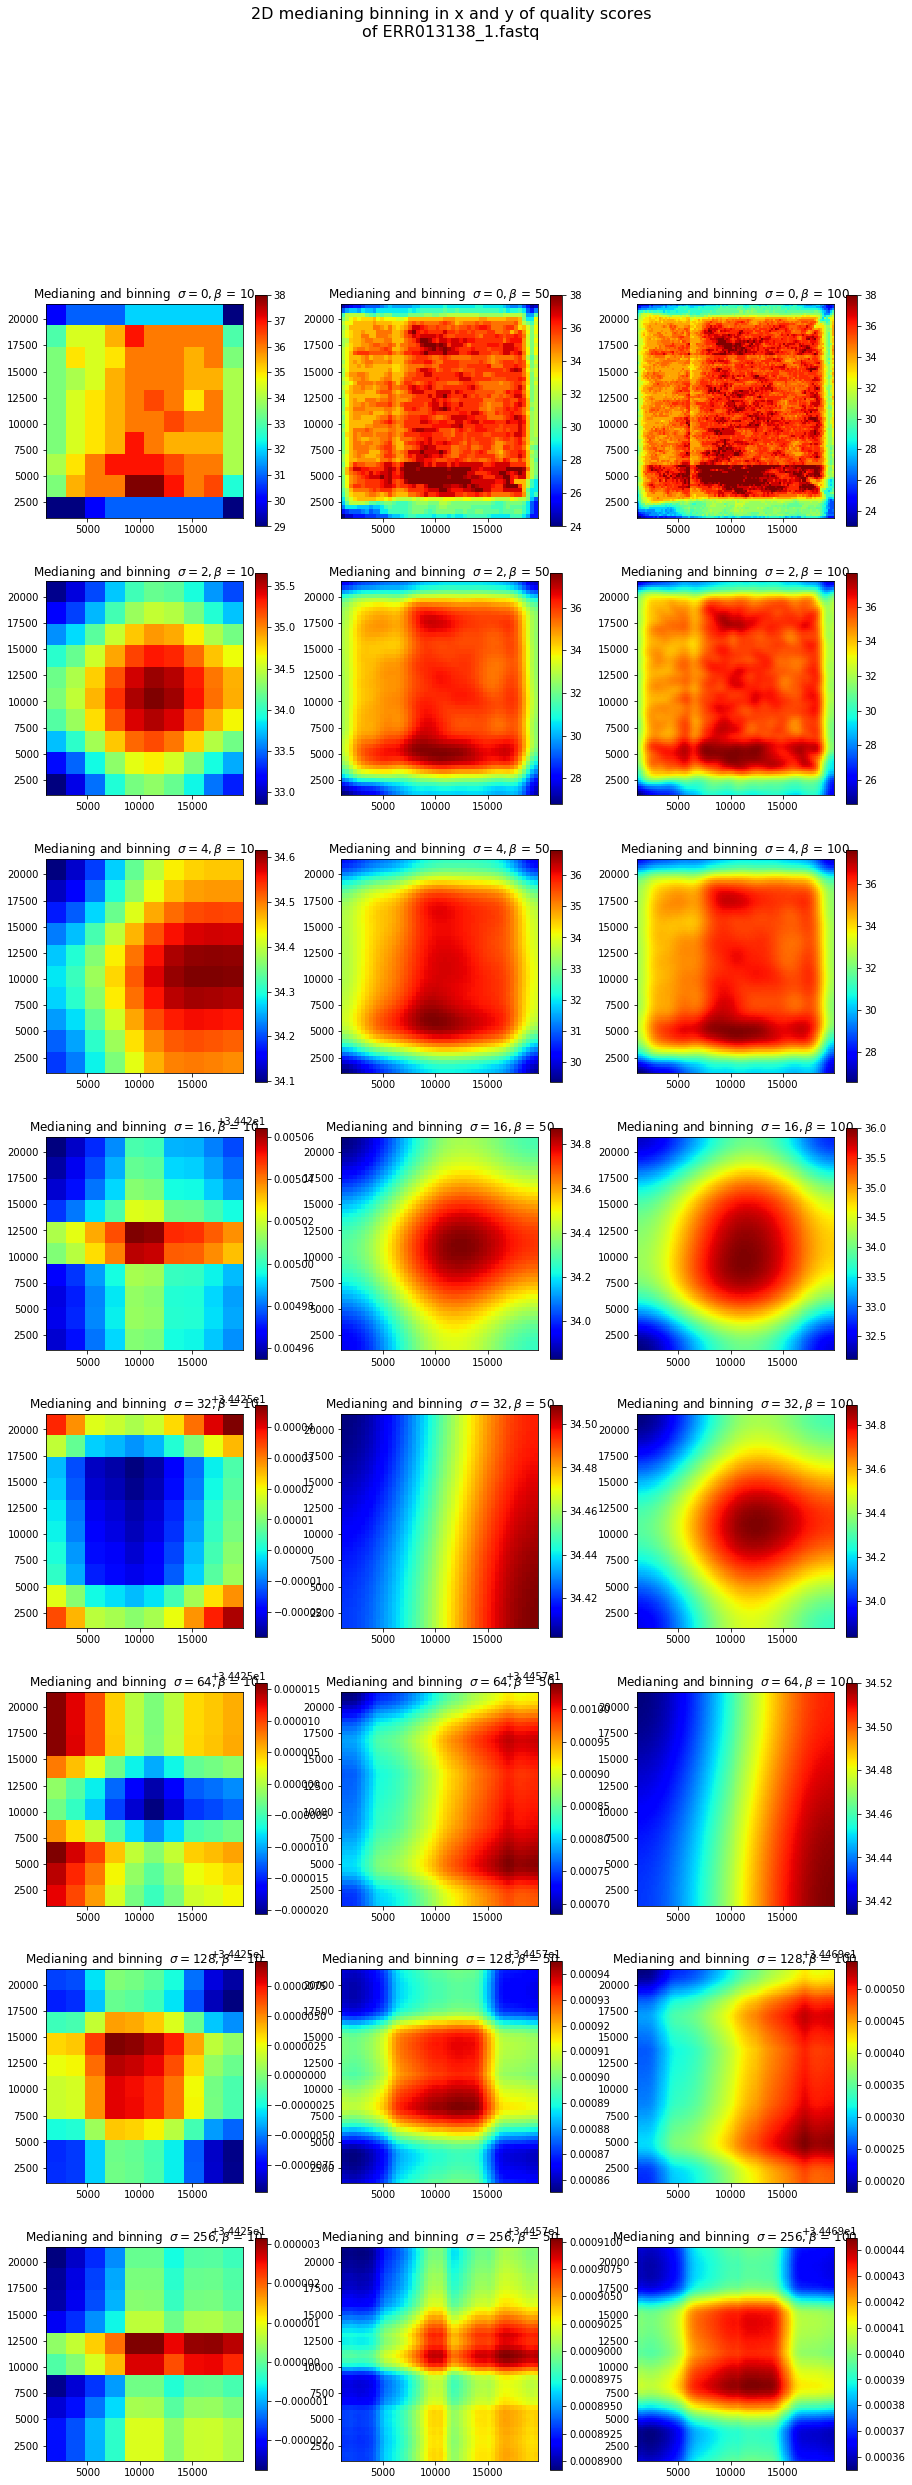

In [9]:
# Medians
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from scipy.ndimage.filters import gaussian_filter
import scipy.stats

def myplot(x, y, w, s, b):
    heatmap, xedges, yedges, k = scipy.stats.binned_statistic_2d(x, y, w, bins=b, statistic='median')
    med = np.median(heatmap)
    heatmap = np.nan_to_num(heatmap, nan=med)
    heatmap = gaussian_filter(heatmap, sigma=s)
    extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
    return heatmap.T, extent

fig, axs = plt.subplots(8,3,figsize=(15,40))

sigmas = [0,0,0, 2,2,2, 4,4,4, 16,16,16, 32,32,32, 64,64,64, 128,128,128, 256,256,256]
bins = [10,50,100, 10,50,100, 10,50,100, 10,50,100, 10,50,100, 10,50,100, 10,50,100, 10,50,100]

for ax, s, b in zip(axs.flatten(), sigmas, bins):
    img, extent = myplot(x_lines, y_lines, median_qas, s, b)
    res = ax.imshow(img, extent=extent, origin='lower', cmap=cm.jet)
    ax.set_title(r"Medianing and binning  $\sigma = %d, \beta$ = %d" % (s,b))
    #ax.set_title(r"Averaging and binning, $\beta$ = %d" % (s))
    fig.colorbar(res, ax=ax)

fig.suptitle('2D medianing binning in x and y of quality scores\nof ERR013138_1.fastq', fontsize=16)

#plt.tight_layout()
plt.savefig('full_genome_x_and_y_and_qa_medianing_binning_smoothing.png')
plt.show()

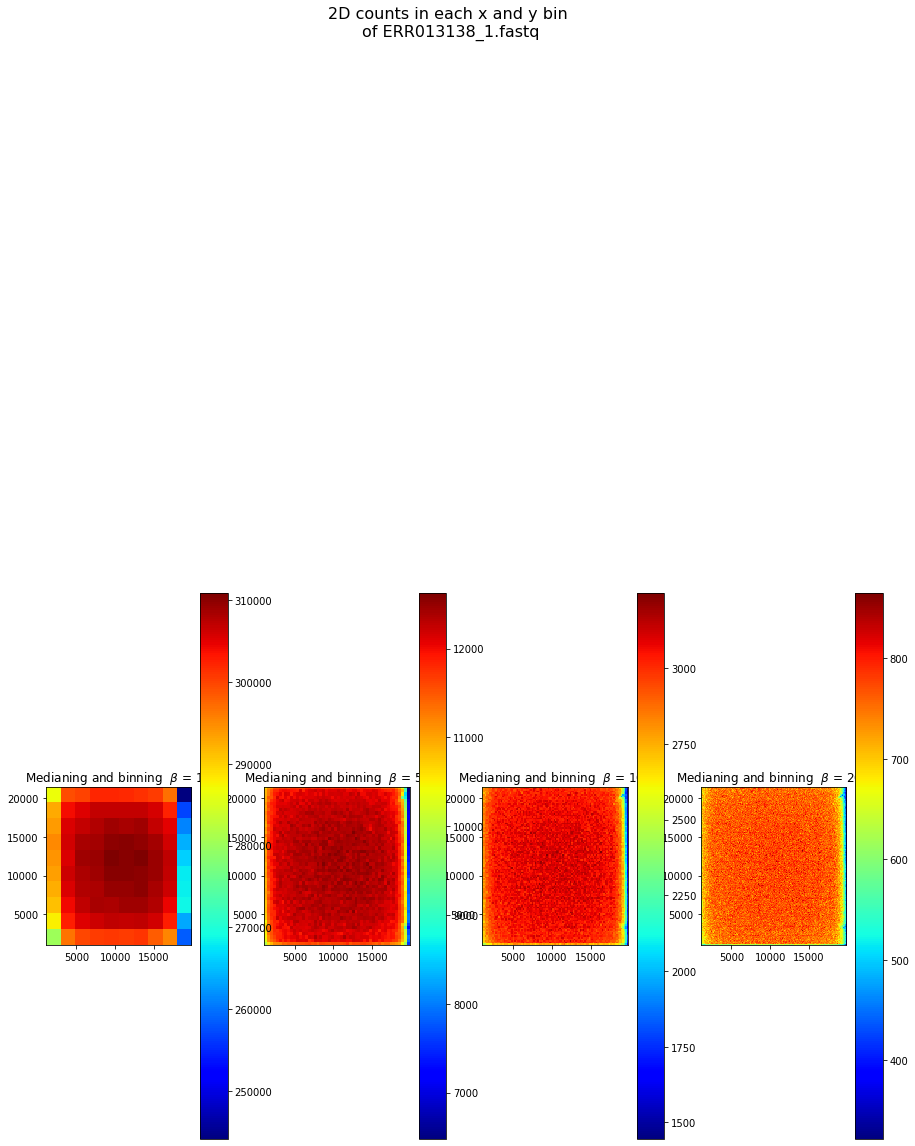

In [11]:
# Do a quick check of the count in each bin (don't want x and y effects to confound quality score analysis)
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from scipy.ndimage.filters import gaussian_filter
import scipy.stats

def myplot(x, y, w, s, b):
    heatmap, xedges, yedges, k = scipy.stats.binned_statistic_2d(x, y, w, bins=b, statistic='count')
    #med = np.median(heatmap)
    #heatmap = np.nan_to_num(heatmap, nan=med)
    heatmap = gaussian_filter(heatmap, sigma=s)
    extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
    return heatmap.T, extent

fig, axs = plt.subplots(1,4,figsize=(15,25))

sigmas = [0,0,0,0]
bins = [10,50,100,200]

for ax, s, b in zip(axs.flatten(), sigmas, bins):
    img, extent = myplot(x_lines, y_lines, median_qas, s, b)
    res = ax.imshow(img, extent=extent, origin='lower', cmap=cm.jet)
    ax.set_title(r"Medianing and binning  $\beta$ = %d" % (b))
    #ax.set_title(r"Averaging and binning, $\beta$ = %d" % (s))
    fig.colorbar(res, ax=ax)

fig.suptitle('2D counts in each x and y bin \nof ERR013138_1.fastq', fontsize=16)

#plt.tight_layout()
plt.savefig('full_genome_x_and_y_counts_binning.png')
plt.show()